In [1]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.datasets import VOCDetection
import torchvision.transforms as T
from torch.utils.data import DataLoader
import random
import matplotlib.pyplot as plt
import numpy as np



In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = fasterrcnn_resnet50_fpn(pretrained=True)
model = model.to(device)
model.eval()



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 76.4MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

100%|██████████| 1999639040/1999639040 [01:12<00:00, 27603359.60it/s]


Extracting ./data/VOCtrainval_11-May-2012.tar to ./data


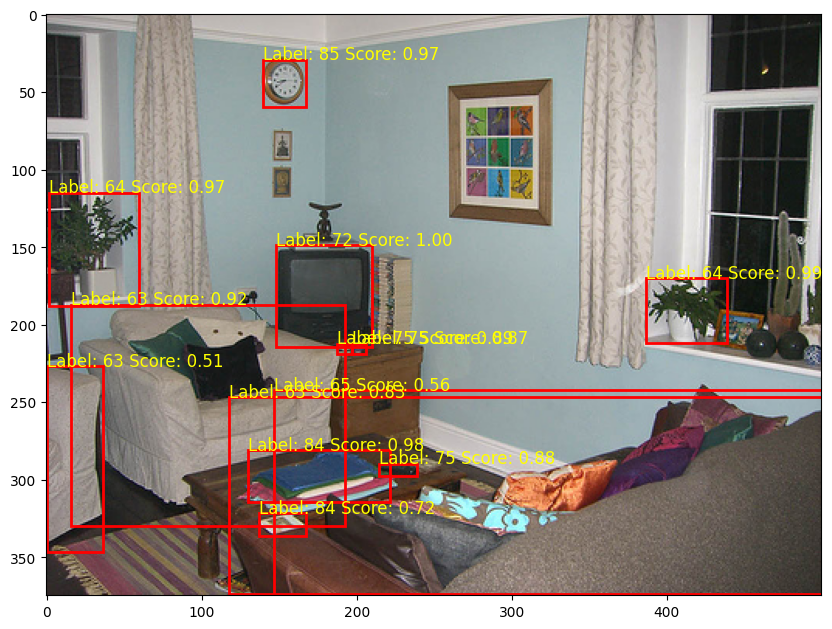

In [3]:
transform = T.Compose([T.ToTensor()])
dataset = VOCDetection(root='./data', year='2012', image_set='train', download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

images, targets = next(iter(dataloader))

images = [image.to(device) for image in images]

with torch.no_grad():
    predictions = model(images)

def visualize_prediction(image, prediction):
    plt.figure(figsize=(10, 10))
    image_np = image.cpu().numpy().transpose(1, 2, 0)
    plt.imshow(image_np)

    for box, label, score in zip(prediction['boxes'], prediction['labels'], prediction['scores']):
        if score > 0.5:
            x1, y1, x2, y2 = box.cpu().numpy()
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                              fill=False, color='red', linewidth=2))
            plt.text(x1, y1, f'Label: {label} Score: {score:.2f}', color='yellow', fontsize=12)

    plt.show()


visualize_prediction(images[0], predictions[0])
